In [21]:
import numpy as np
from numpy import linalg as LA
from scipy import ndimage

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme()

from scipy.optimize import curve_fit

import glob

In [22]:
def convertCSV(fileName: list[str]) -> list[pd.core.frame.DataFrame]:
    sep, header, names, = ' ', 146, ['x1','y1','x2','y2','nan']
    csvList = []
    for n in fileName:
        curCSV = pd.read_csv (n, sep=sep, header=header, names = names)
        csvList.append(curCSV)
    return csvList

In [23]:
fileNames = glob.glob('./AFM_Data/no_feedback/*Amplitude_Avg.iv.cur')
dataPoints = convertCSV(fileNames)
dataPoints_HOPG, dataPoints_AU = dataPoints[1:10], dataPoints[10:]

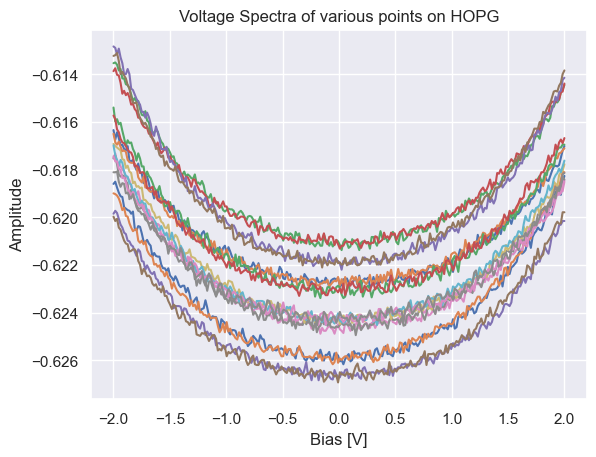

In [24]:
fig, ax = plt.subplots()
sns.set_theme()

for data in dataPoints_HOPG:
    sns.lineplot(data = data, x = 'x1', y = 'y1')
    sns.lineplot(data = data, x = 'x2', y = 'y2')

plt.title("Voltage Spectra of various points on HOPG")
plt.ylabel("Amplitude")
plt.xlabel("Bias [V]")
plt.show()

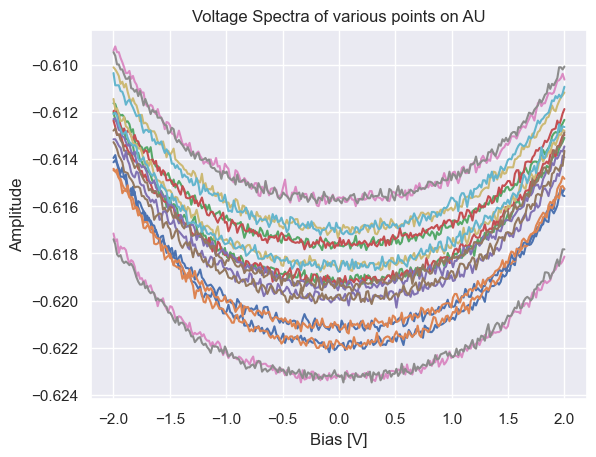

In [25]:
fig, ax = plt.subplots()
sns.set_theme()


for data in dataPoints_AU:
    sns.lineplot(data = data, x = 'x1', y = 'y1')
    sns.lineplot(data = data, x = 'x2', y = 'y2')

plt.title("Voltage Spectra of various points on AU")
plt.ylabel("Amplitude")
plt.xlabel("Bias [V]")
plt.show()

In [81]:
def calculateForce(Vbias, Vc, cz, Off):
  return cz * ((Vbias + Vc)**2) + Off

def fitCurves(dataPoints):
  fitParameters = []

  for n in dataPoints:
    popt, pcov = curve_fit(calculateForce, n["x1"], -n["y1"])
    fitParameters.append((popt, pcov))

  return fitParameters

In [82]:
fit_parameters_HOPG = fitCurves(dataPoints_HOPG)
fit_parameters_AU = fitCurves(dataPoints_AU)

In [83]:
mean_parameters_HOPG = np.mean([data[0] for data in fit_parameters_HOPG], axis = 0)
mean_parameters_AU = np.mean([data[0] for data in fit_parameters_AU], axis = 0)

Text(0.5, 1.0, 'Parabolic fit of Voltage Spectra')

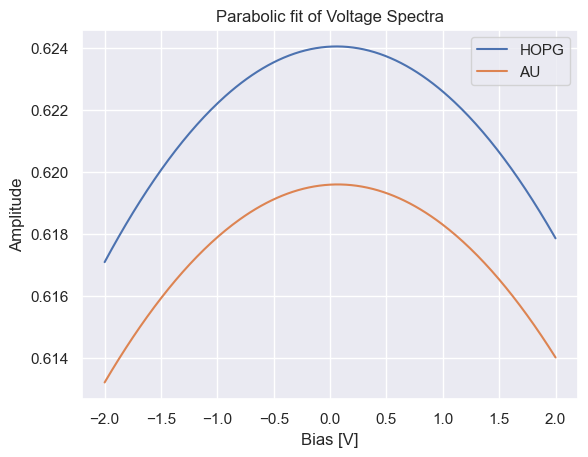

In [84]:
fig, ax = plt.subplots()
sns.set_theme()

x = np.linspace(-2, 2, 255)

sns.lineplot(x = x, y = calculateForce(x, *mean_parameters_HOPG),label="HOPG")
sns.lineplot(x = x, y = calculateForce(x, *mean_parameters_AU),label="AU")

plt.xlabel("Bias [V]")
plt.ylabel("Amplitude")
plt.title("Parabolic fit of Voltage Spectra")

In [ ]:
Cur1f = pd.read_csv (r'SampleA_new_tip__0229_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])


time: 6.77 ms (started: 2022-08-19 15:45:22 +00:00)


In [ ]:
Cur1f

,x1,y1,x2,y2,nan
0,-9.500000,155.047852,-9.500000,134.361328,NaN
1,-9.425490,151.737671,-9.425490,130.444702,NaN
2,-9.350981,148.478027,-9.350981,126.780762,NaN
3,-9.276470,145.268921,-9.276470,123.260010,NaN
4,-9.201961,141.857666,-9.201961,119.562378,NaN
...,...,...,...,...,...
251,9.201961,113.371582,9.201961,134.622437,NaN
252,9.276470,117.069214,9.276470,138.042114,NaN
253,9.350981,120.598389,9.350981,141.613403,NaN
254,9.425490,124.194946,9.425490,144.839355,NaN


time: 18.5 ms (started: 2022-08-19 15:45:23 +00:00)


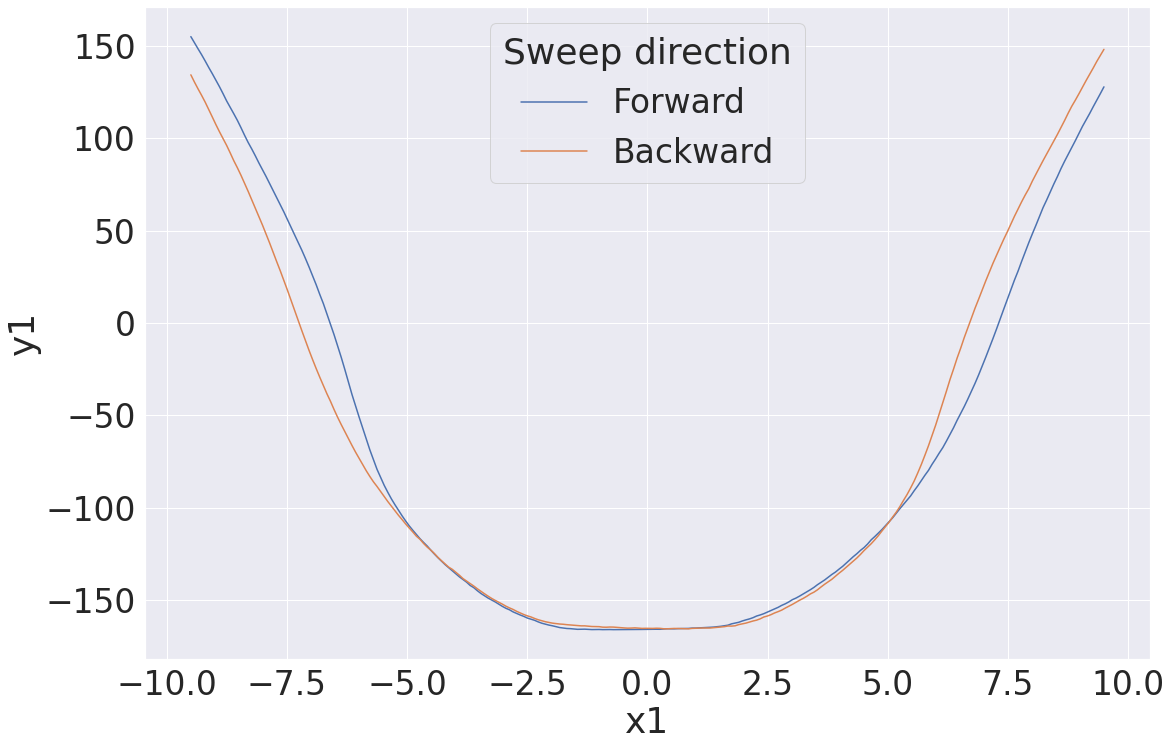

time: 539 ms (started: 2022-08-19 15:45:24 +00:00)


In [ ]:

fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

sns.lineplot(data=Cur1f,x='x1',y='y1',label="Forward")
sns.lineplot(data=Cur1f,x='x2',y='y2',label="Backward")

plt.legend(title="Sweep direction")


In [ ]:
Curav1=(Cur2+Cur3+Cur4+Cur5+Cur6+Cur7+Cur8+Cur9+Cur10)/9
Curav2=(Cur12+Cur13+Cur14+Cur15+Cur16+Cur17+Cur18+Cur19+Cur20)/9

time: 12 ms (started: 2022-08-19 15:45:32 +00:00)


In [ ]:
poptav1, pcovav1 = curve_fit(Force,Curav1["x1"],-Curav1["y1"])
poptav2, pcovav2 = curve_fit(Force,Curav2["x1"],-Curav2["y1"])

time: 30.6 ms (started: 2022-08-19 15:45:32 +00:00)


In [ ]:
poptav1

array([-0.05822435, -0.00164428,  0.62404775])

time: 5.27 ms (started: 2022-08-19 15:45:33 +00:00)


In [ ]:
pcovav1[0,0]

1.2240277637812364e-05

time: 4.99 ms (started: 2022-08-19 15:45:33 +00:00)


In [ ]:
pcovav2[0,0]

1.622630350392456e-05

time: 4.9 ms (started: 2022-08-19 15:45:33 +00:00)


In [ ]:
poptav2

array([-0.06746679, -0.00146482,  0.61930689])

time: 3.92 ms (started: 2022-08-19 15:45:33 +00:00)


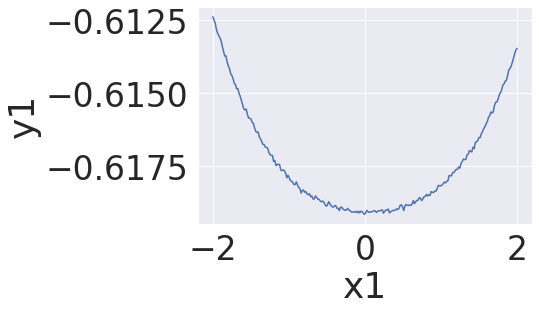

time: 299 ms (started: 2022-08-19 15:45:34 +00:00)


In [ ]:
sns.lineplot(data=Curav2,x='x1',y='y1')

In [ ]:
31.152974376454/17

1.8325279044972942

time: 3.74 ms (started: 2022-08-19 15:45:34 +00:00)


In [ ]:
eps0=8.854
#Fp=-2*k*df/fres
def Sphere(U,a,c,b):
  return a*np.abs(U+b)+c

def Cone(U,aFp,c):
  return np.sqrt(aFp**2/(4*np.pi*eps0))*U**2+c

time: 1.16 ms (started: 2022-08-19 15:45:35 +00:00)


In [ ]:
Cur1f = pd.read_csv (r'SampleA_new_tip__0243_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])

time: 6.81 ms (started: 2022-08-19 15:45:54 +00:00)


Text(0.5, 1.0, 'Voltage Spectra with feedback on HOPG')

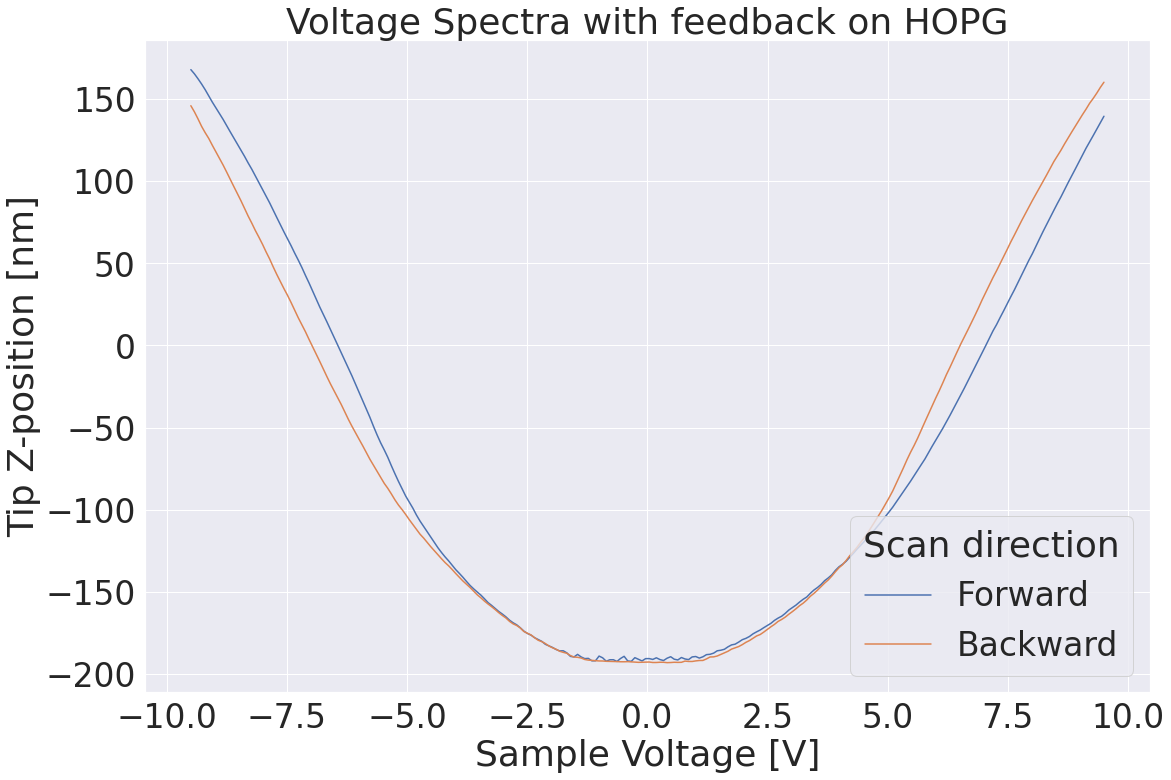

time: 542 ms (started: 2022-08-19 15:45:55 +00:00)


In [ ]:

fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

sns.lineplot(data=Cur1f,x='x1',y='y1',label="Forward")
sns.lineplot(data=Cur1f,x='x2',y='y2',label="Backward")

plt.legend(title="Scan direction",loc=4)
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")
plt.title("Voltage Spectra with feedback on HOPG")

In [ ]:
Cur2f = pd.read_csv (r'SampleA_new_tip__0251_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])

time: 7.66 ms (started: 2022-08-19 15:46:12 +00:00)


Text(0.5, 1.0, 'Voltage Spectra with feedback on AU')

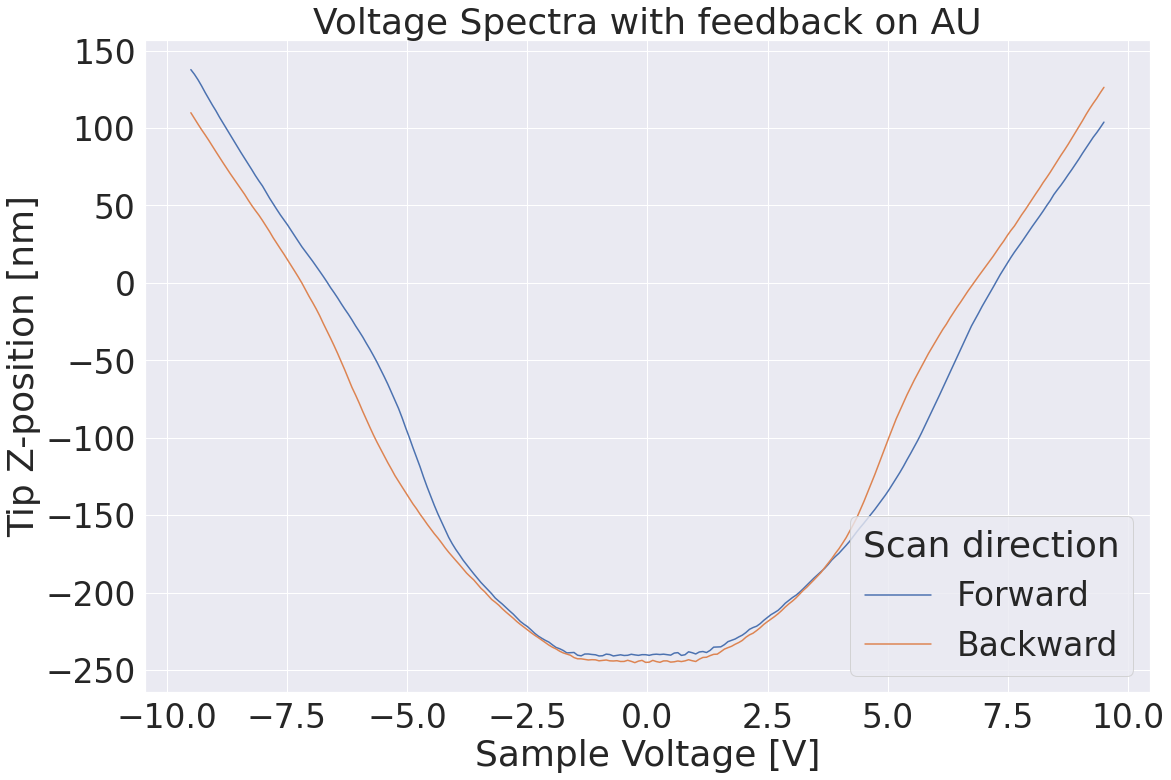

time: 546 ms (started: 2022-08-19 15:46:12 +00:00)


In [ ]:

fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

sns.lineplot(data=Cur2f,x='x1',y='y1',label="Forward")
sns.lineplot(data=Cur2f,x='x2',y='y2',label="Backward")

plt.legend(title="Scan direction",loc=4)
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")
plt.title("Voltage Spectra with feedback on AU")

In [ ]:
Cur3f = pd.read_csv (r'SampleA_new_tip__0229_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])


time: 4.57 ms (started: 2022-08-19 15:46:16 +00:00)


In [ ]:
Cur4f = pd.read_csv (r'SampleA_new_tip__0251_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])

time: 4.75 ms (started: 2022-08-19 15:46:17 +00:00)


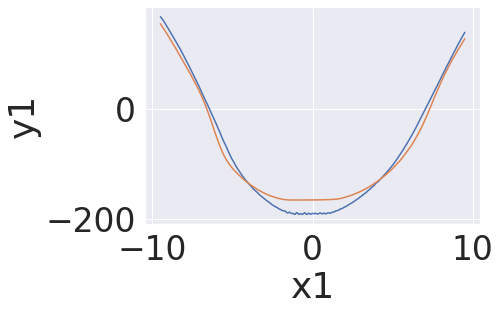

time: 338 ms (started: 2022-08-19 15:46:19 +00:00)


In [ ]:
sns.lineplot(data=Cur1f,x='x1',y='y1')
sns.lineplot(data=Cur3f,x='x1',y='y1')

In [ ]:
Cur1fc=Cur1f[(Cur1f["x1"]>0) | (Cur1f["x1"]<-0)]
popt2f, pcov2f = curve_fit(Sphere,Cur1fc["x1"],Cur1fc["y1"])
popt1f, pcov1f = curve_fit(Cone,Cur1fc["x1"],Cur1fc["y1"])

time: 47.1 ms (started: 2022-08-19 15:46:20 +00:00)


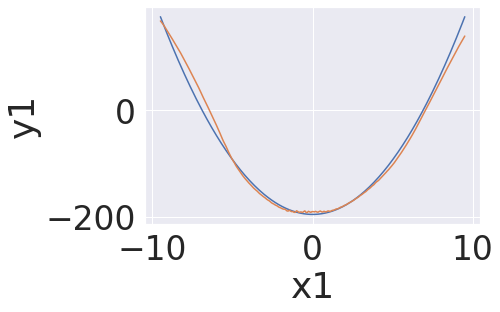

time: 321 ms (started: 2022-08-19 15:46:20 +00:00)


In [ ]:
plt.plot(Cur1f["x1"],Cone(Cur1f["x1"],popt1f[0],popt1f[1]))
sns.lineplot(data=Cur1f,x='x1',y='y1')

In [ ]:
Cur1fc=Cur1f[(Cur1f["x1"]>7) | (Cur1f["x1"]<-7)]
popt2f, pcov2f = curve_fit(Sphere,Cur1fc["x1"],Cur1fc["y1"])

time: 32.9 ms (started: 2022-08-19 15:46:21 +00:00)


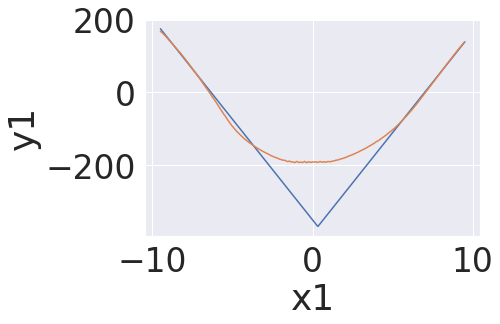

time: 310 ms (started: 2022-08-19 15:46:21 +00:00)


In [ ]:
plt.plot(Cur1f["x1"],Sphere(Cur1f["x1"],popt2f[0],popt2f[1],popt2f[2]))
sns.lineplot(data=Cur1f,x='x1',y='y1')

In [ ]:
eps0=8.854*10**(-12)
def Sphere2(U,R,Fp,c,d):
  return (np.pi*eps0*R/Fp)**0.5*np.abs(U+d)*10**(9)+c
def Cone2(U,Fp,theta,c,d):
  a=2*np.pi*eps0/(np.arcsinh(1/np.tan(theta*np.pi/360)))
  return (a**2/(4*np.pi*eps0*Fp))*((U+d)**2)*10**(9)+c

def Flat2(U,R,Fp,c,d):
  return (np.pi*eps0*R**2/Fp)**(1/3)*((U+d)**2)**(1/3)*10**(9)+c

time: 4.62 ms (started: 2022-08-19 15:46:22 +00:00)


In [ ]:
Cur1fc=Cur1f[(Cur1f["x1"]>5) | (Cur1f["x1"]<-5)]
popt2f, pcov2f = curve_fit(Cone2,Cur1fc["x1"],Cur1fc["y1"],bounds=([0.01105,-np.inf,-np.inf,-np.inf],[0.011061,np.inf,np.inf,np.inf]))
popt2f

array([ 1.10552093e-02,  9.66718742e+01, -1.83184952e+02, -2.80311472e-01])

time: 77.7 ms (started: 2022-08-19 15:46:23 +00:00)


In [ ]:
r2_score(Cur1f[(Cur1f["x1"]>4) | (Cur1f["x1"]<-4)]["y1"],Cone2(Cur1f[(Cur1f["x1"]>4) | (Cur1f["x1"]<-4)]["x1"],0.011,96.7,-183,-.28))

0.9867816146169387

time: 39.5 ms (started: 2022-08-19 18:00:27 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

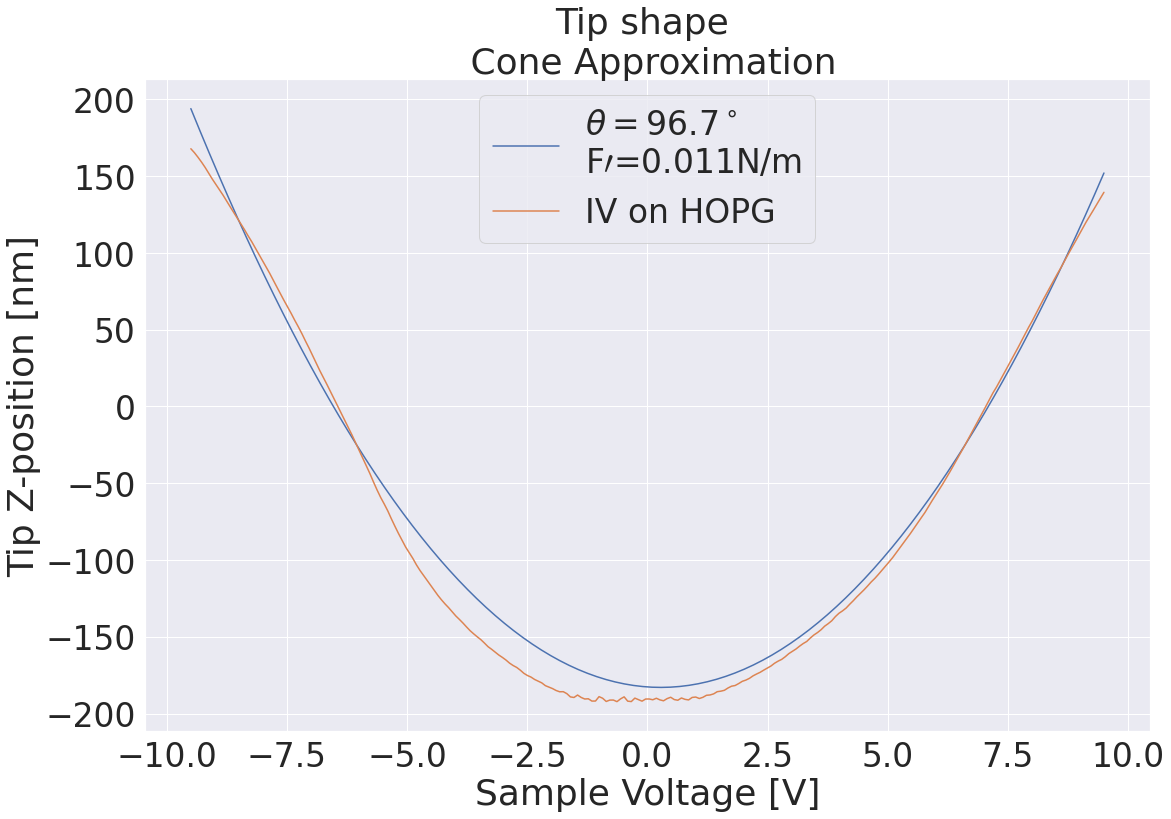

time: 738 ms (started: 2022-08-19 15:46:23 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-9.5,9.5,100)
plt.plot(x,Cone2(x,0.011,96.7,-183,-.28),label=r'$\theta=96.7^\circ$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur1f,x='x1',y='y1',label="IV on HOPG")


plt.legend()
plt.title("Tip shape \n Cone Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
Cur4fc=Cur4f[(Cur1f["x1"]>5) | (Cur4f["x1"]<-5)]
popt2f, pcov2f = curve_fit(Cone2,Cur4fc["x1"],Cur4fc["y1"],bounds=([0.01105,-np.inf,-np.inf,-np.inf],[0.011061,np.inf,np.inf,np.inf]))
popt2f

array([ 1.10608971e-02,  9.28174250e+01, -1.81325573e+02, -3.15844947e-01])

time: 62.4 ms (started: 2022-08-19 15:46:24 +00:00)


In [ ]:
r2_score(Cur4f[(Cur4f["x1"]>4) | (Cur4f["x1"]<-4)]["y1"],Cone2(Cur4f[(Cur4f["x1"]>4) | (Cur4f["x1"]<-4)]["x1"],0.011,92.81,-181,-.32))

0.9534403160393866

time: 29 ms (started: 2022-08-19 18:01:37 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

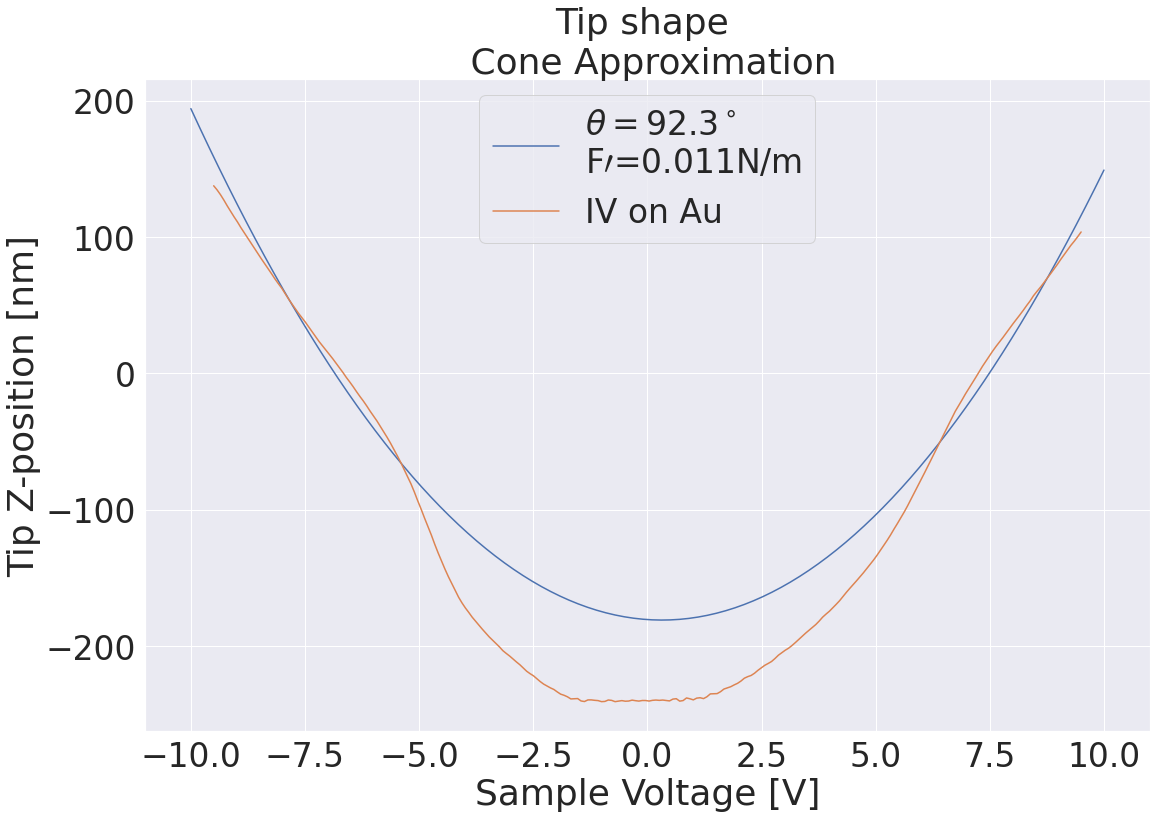

time: 649 ms (started: 2022-08-19 15:46:25 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-10,10,100)
plt.plot(x,Cone2(x,0.011,92.81,-181,-.32),label=r'$\theta=92.3^\circ$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur4f,x='x1',y='y1',label="IV on Au")


plt.legend()
plt.title("Tip shape \n Cone Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
x=np.linspace(-10,10,100)

time: 2.95 ms (started: 2022-08-19 15:46:25 +00:00)


TypeError: ignored

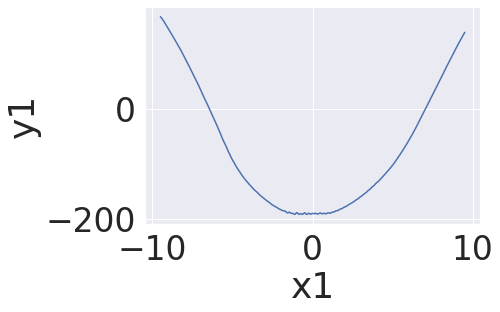

time: 279 ms (started: 2022-08-19 15:46:26 +00:00)


In [ ]:
sns.lineplot(data=Cur1f,x='x1',y='y1')
plt.plot(x,Sphere2(x,6000*10**(-9),0.06)-350)

In [ ]:
Cur1fc=Cur1f[(Cur1f["x1"]>4) | (Cur1f["x1"]<-4)]
popt2f, pcov2f = curve_fit(Sphere2,Cur1fc["x1"],Cur1fc["y1"],bounds=([-np.inf,0.01105,-np.inf,-np.inf],[np.inf,0.011061,np.inf,np.inf]))
popt2f

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


array([1.07000186e-08, 1.10606146e-02, 9.99995384e-01, 9.70742807e-01])

time: 277 ms (started: 2022-08-19 17:57:54 +00:00)


In [ ]:
r2_score(Cur1f[(Cur1f["x1"]>4) | (Cur1f["x1"]<-4)]["y1"],Sphere2(Cur1f[(Cur1f["x1"]>4) | (Cur1f["x1"]<-4)]["x1"],1.31*10**(-6),0.011,-386,-.279))

0.9908755595653046

time: 56.2 ms (started: 2022-08-19 17:59:51 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

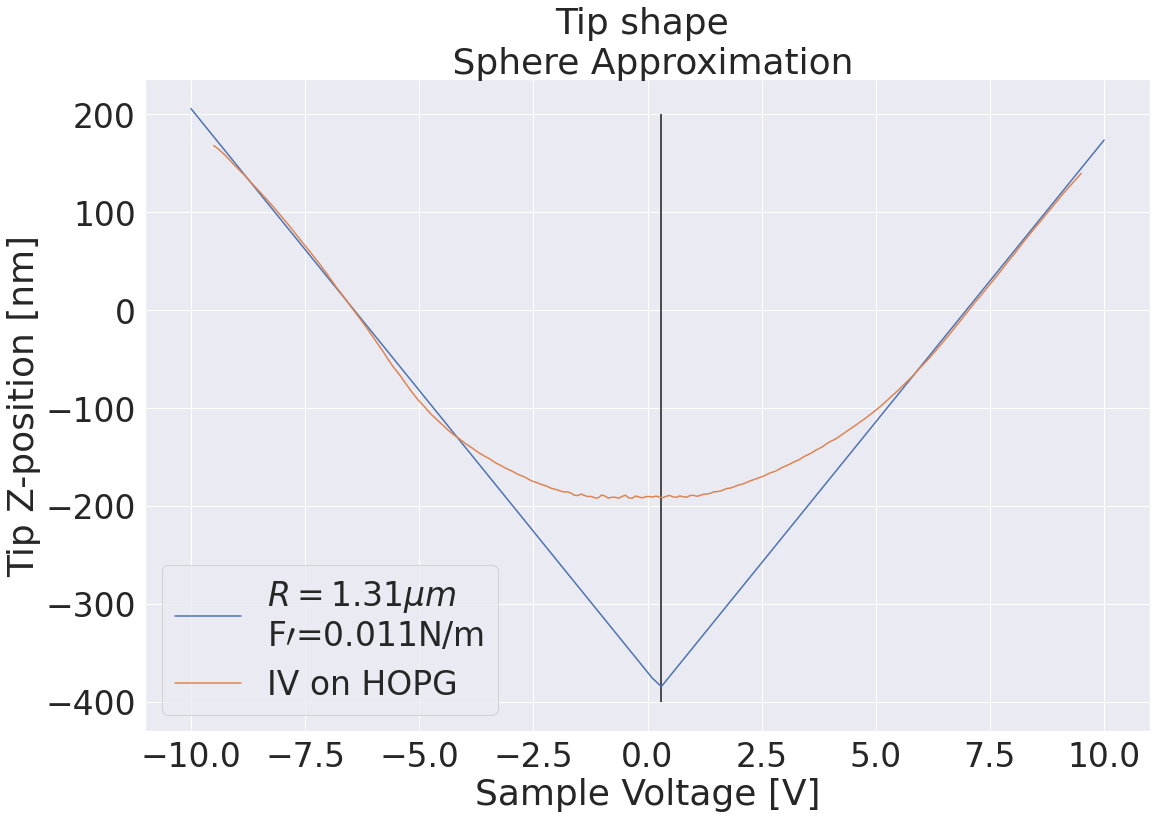

time: 913 ms (started: 2022-08-19 17:57:46 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-10,10,100)
plt.plot(x,Sphere2(x,1.31*10**(-6),0.011,-386,-.279),label=r'$R=1.31\mu m$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur1f,x='x1',y='y1',label="IV on HOPG")

plt.vlines(0.3,-400,200)
plt.legend()
plt.title("Tip shape \n Sphere Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
Cur4fc=Cur4f[(Cur4f["x1"]>4) | (Cur4f["x1"]<-4)]
popt2f, pcov2f = curve_fit(Sphere2,Cur4fc["x1"],Cur4fc["y1"],bounds=([-10**(-7),0.01105,-np.inf,-np.inf],[10**(-5),0.011061,np.inf,np.inf]))
popt2f

array([ 1.14478743e-06,  1.10596443e-02, -3.81110944e+02, -2.94328084e-01])

time: 260 ms (started: 2022-08-19 15:53:44 +00:00)


In [ ]:
r2_score(Cur4f[(Cur4f["x1"]>4) | (Cur4f["x1"]<-4)]["y1"],Sphere2(Cur4f[(Cur4f["x1"]>4) | (Cur4f["x1"]<-4)]["x1"],0.85*10**(-6),0.011,-320,-.33))

0.957179955101066

time: 24.1 ms (started: 2022-08-19 18:09:47 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

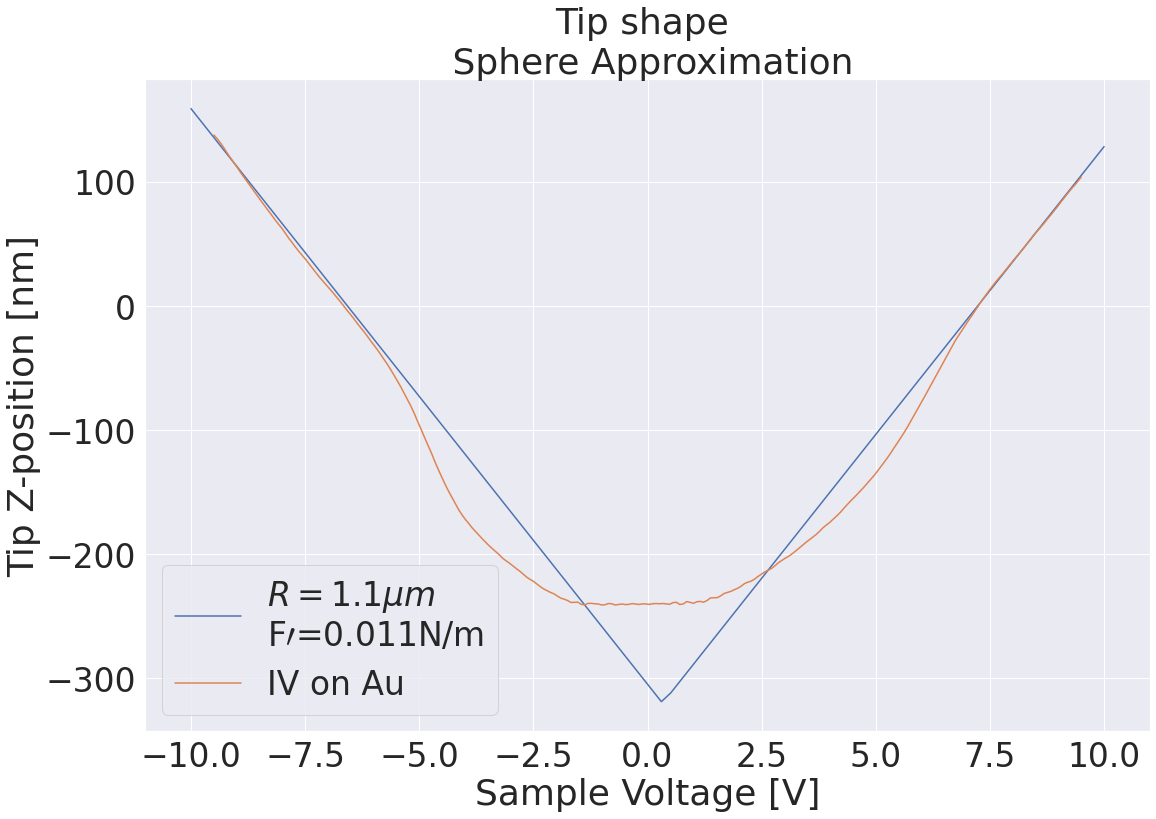

time: 697 ms (started: 2022-08-19 18:09:25 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-10,10,100)
plt.plot(x,Sphere2(x,0.85*10**(-6),0.011,-320,-.33),label=r'$R=1.1\mu m$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur4f,x='x1',y='y1',label="IV on Au")


plt.legend()
plt.title("Tip shape \n Sphere Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
Cur1fc=Cur1f[(Cur1f["x1"]>5) | (Cur1f["x1"]<-5)]
popt2f, pcov2f = curve_fit(Flat2,Cur1fc["x1"],Cur1fc["y1"],bounds=([-np.inf,0.01105,-np.inf,-np.inf],[np.inf,0.011061,np.inf,np.inf]))
popt2f

array([-1.34613201e-06,  1.10555000e-02, -5.88906734e+02, -2.74993395e-01])

time: 154 ms (started: 2022-08-19 15:46:28 +00:00)


In [ ]:
r2_score(Cur1f[(Cur1f["x1"]>3) | (Cur1f["x1"]<-3)]["y1"],Flat2(Cur1f[(Cur1f["x1"]>3) | (Cur1f["x1"]<-3)]["x1"],1.35*10**(-6),0.011,-589,-.27))

0.9269549139404657

time: 25.3 ms (started: 2022-08-19 17:55:15 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

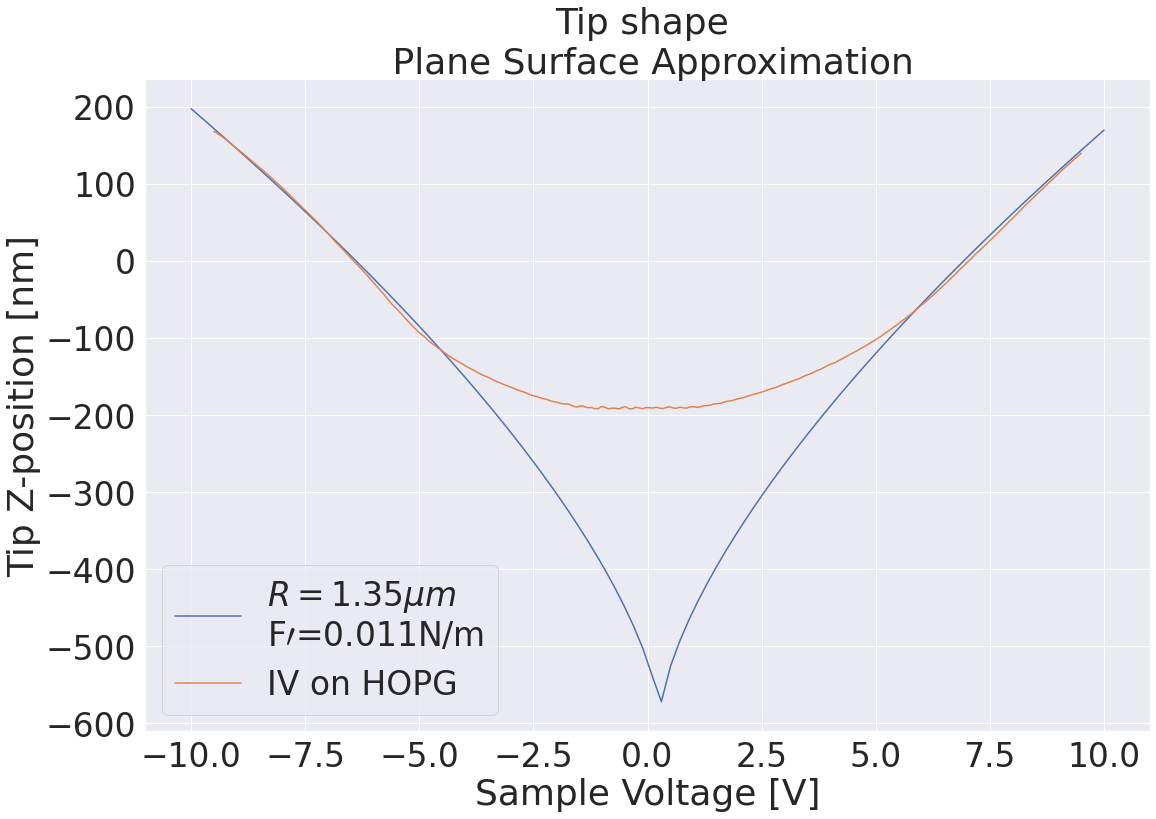

time: 547 ms (started: 2022-08-19 15:46:29 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-10,10,100)
plt.plot(x,Flat2(x,1.35*10**(-6),0.011,-589,-.27),label=r'$R=1.35\mu m$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur1f,x='x1',y='y1',label="IV on HOPG")


plt.legend()
plt.title("Tip shape \n Plane Surface Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
Cur4fc=Cur1f[(Cur4f["x1"]>5) | (Cur4f["x1"]<-5)]
popt2f, pcov2f = curve_fit(Flat2,Cur4fc["x1"],Cur4fc["y1"],bounds=([-np.inf,0.01105,-np.inf,-np.inf],[np.inf,0.011061,np.inf,np.inf]))
popt2f

array([-1.34613201e-06,  1.10555000e-02, -5.88906734e+02, -2.74993395e-01])

time: 161 ms (started: 2022-08-19 15:46:29 +00:00)


In [ ]:
r2_score(Cur4f[(Cur4f["x1"]>3) | (Cur4f["x1"]<-3)]["y1"],Flat2(Cur4f[(Cur4f["x1"]>3) | (Cur4f["x1"]<-3)]["x1"],1.35*10**(-6),0.011,-589,-.275))

0.9441134145878096

time: 29.2 ms (started: 2022-08-19 18:04:36 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

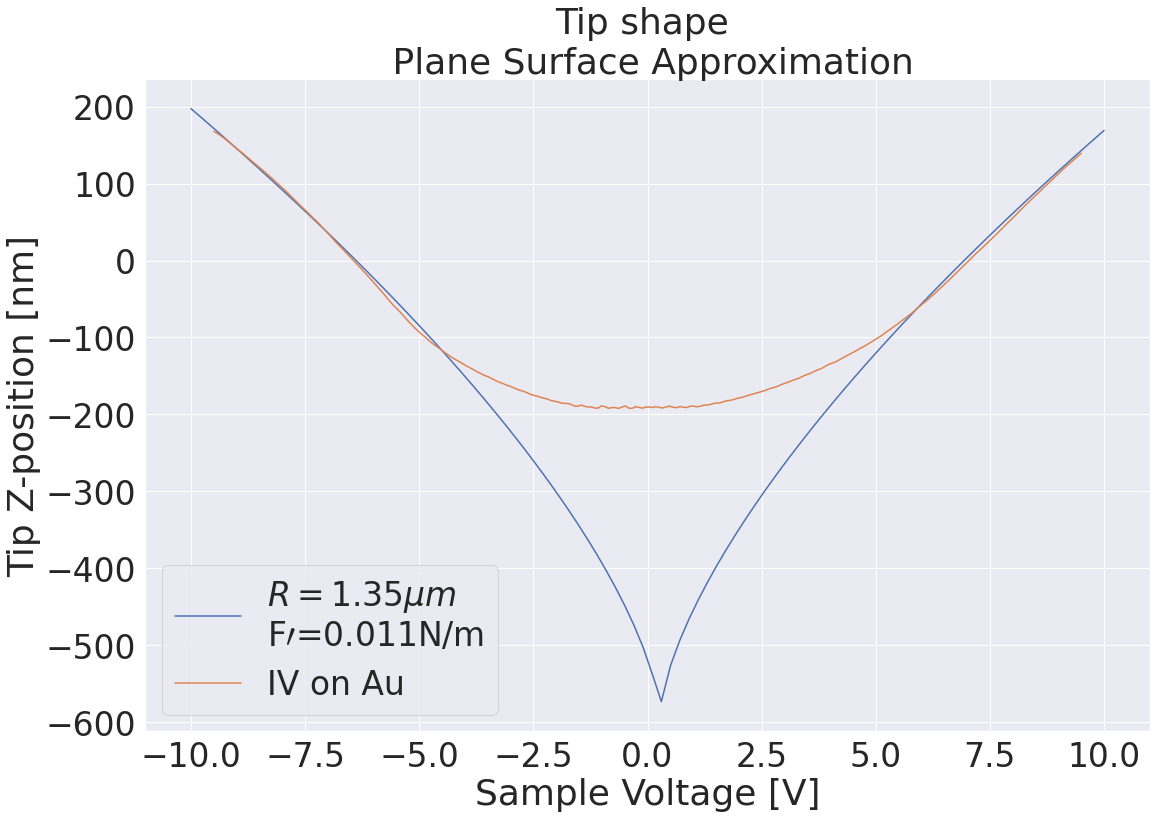

time: 554 ms (started: 2022-08-19 15:46:30 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

x=np.linspace(-10,10,100)
plt.plot(x,Flat2(x,1.35*10**(-6),0.011,-589,-.275),label=r'$R=1.35\mu m$'+ '\n'+r'F$\prime$=0.011N/m')
sns.lineplot(data=Cur1f,x='x1',y='y1',label="IV on Au")


plt.legend()
plt.title("Tip shape \n Plane Surface Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
plt.plot(Cur1f["x1"],Sphere2(Cur1f["x1"],5000*10**(-9),0.06)-350)
sns.lineplot(data=Cur1f,x='x1',y='y1')

TypeError: ignored

time: 16.6 ms (started: 2022-08-19 15:46:30 +00:00)


In [ ]:
np.std([140,145])

2.5

time: 4.22 ms (started: 2022-08-19 15:46:31 +00:00)


In [ ]:
plt.plot(Cur1f["x1"],Cone2(Cur1f["x1"],0.06,1)-190)
sns.lineplot(data=Cur1f,x='x1',y='y1')

TypeError: ignored

time: 12.3 ms (started: 2022-08-19 15:46:31 +00:00)


In [ ]:
2*np.pi/(np.arcsinh(1/np.tan(50)))

-3.120597251412871

time: 5.27 ms (started: 2022-08-19 15:46:31 +00:00)


In [ ]:
Resonance = pd.read_csv (r'resonance3.cur',sep=' ',header=29,names=['x1','y1','x2','y2','nan'])

time: 11.6 ms (started: 2022-08-19 15:46:34 +00:00)


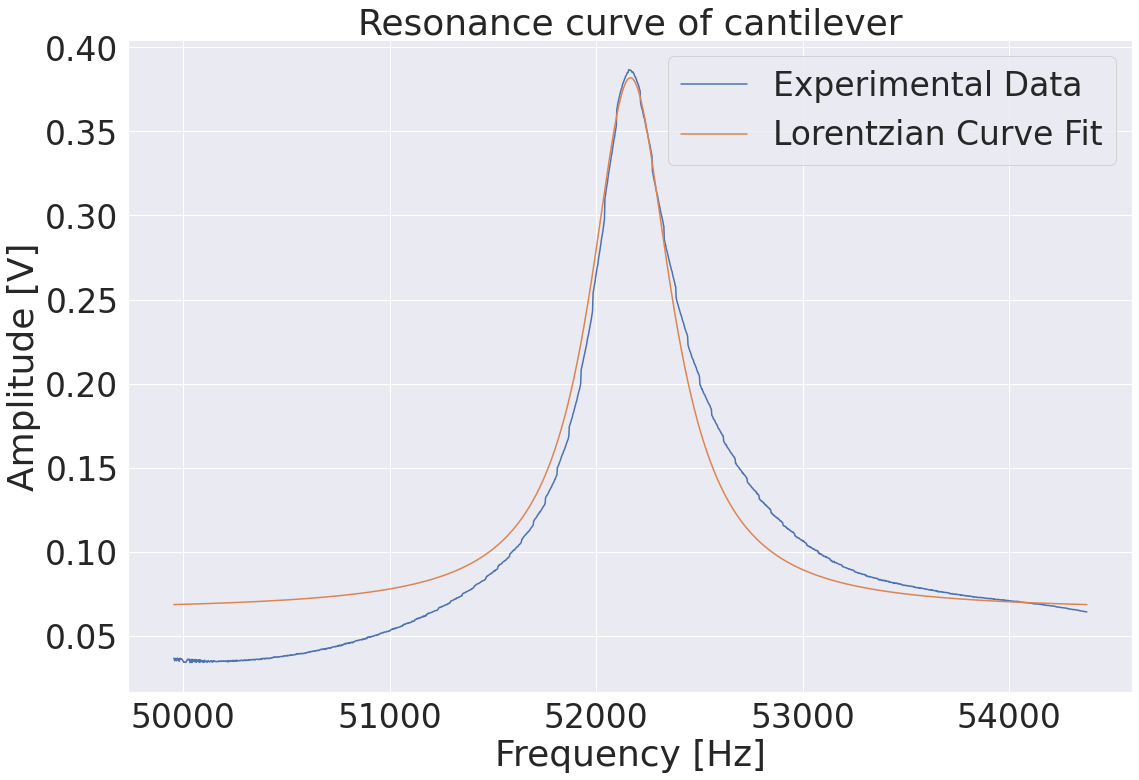

time: 548 ms (started: 2022-08-19 15:46:35 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)

sns.lineplot(data=Resonance,x='x1',y='y1',label="Experimental Data")
sns.lineplot(data=Resonance,x='x2',y='y2',label='Lorentzian Curve Fit')
plt.legend()
plt.xlabel("Frequency [Hz]")
plt.ylabel("Amplitude [V]")
plt.title("Resonance curve of cantilever")

plt.show()

In [ ]:
31.152974376454/17

1.8325279044972942

time: 4.54 ms (started: 2022-06-29 16:11:13 +00:00)


In [ ]:
0.2/17

0.011764705882352941

time: 8.5 ms (started: 2022-06-29 16:12:13 +00:00)


In [ ]:
x=np.linspace(-10,10,100)

time: 8.43 ms (started: 2022-06-29 20:51:46 +00:00)


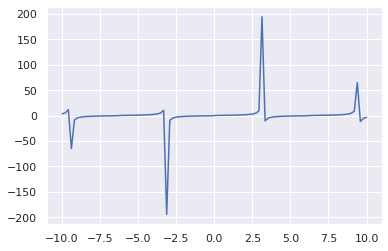

time: 489 ms (started: 2022-06-29 20:51:53 +00:00)


In [ ]:
plt.plot(x,(1/np.arcsinh(1/np.tan(x/2))))

In [ ]:
1/(np.arcsinh(1/np.tan(x/2)))

In [ ]:
A0=-1
ap=-0.6
k=1.40893
Q=168.095

a=A0/ap

time: 4.66 ms (started: 2022-07-19 13:01:06 +00:00)


In [ ]:
k*(1-2*a**2+np.sqrt(4*Q**2*(a**2-1)+1))/(2*(Q**2-a**2))

0.011063202758343273

time: 7.21 ms (started: 2022-07-19 13:01:07 +00:00)


In [ ]:
popt2f, pcov2f = curve_fit(Flat2,x2a[:],y2a[:],bounds=([-np.inf,0.01105,-np.inf,-np.inf],[np.inf,0.011061,np.inf,np.inf]))

time: 370 ms (started: 2022-08-19 21:10:59 +00:00)


In [ ]:
popt2f

array([-6.60343632e-07,  1.10555000e-02, -2.85421014e+02,  1.84927024e+00])

time: 14 ms (started: 2022-08-19 21:11:00 +00:00)


Text(0, 0.5, 'Tip Z-position [nm]')

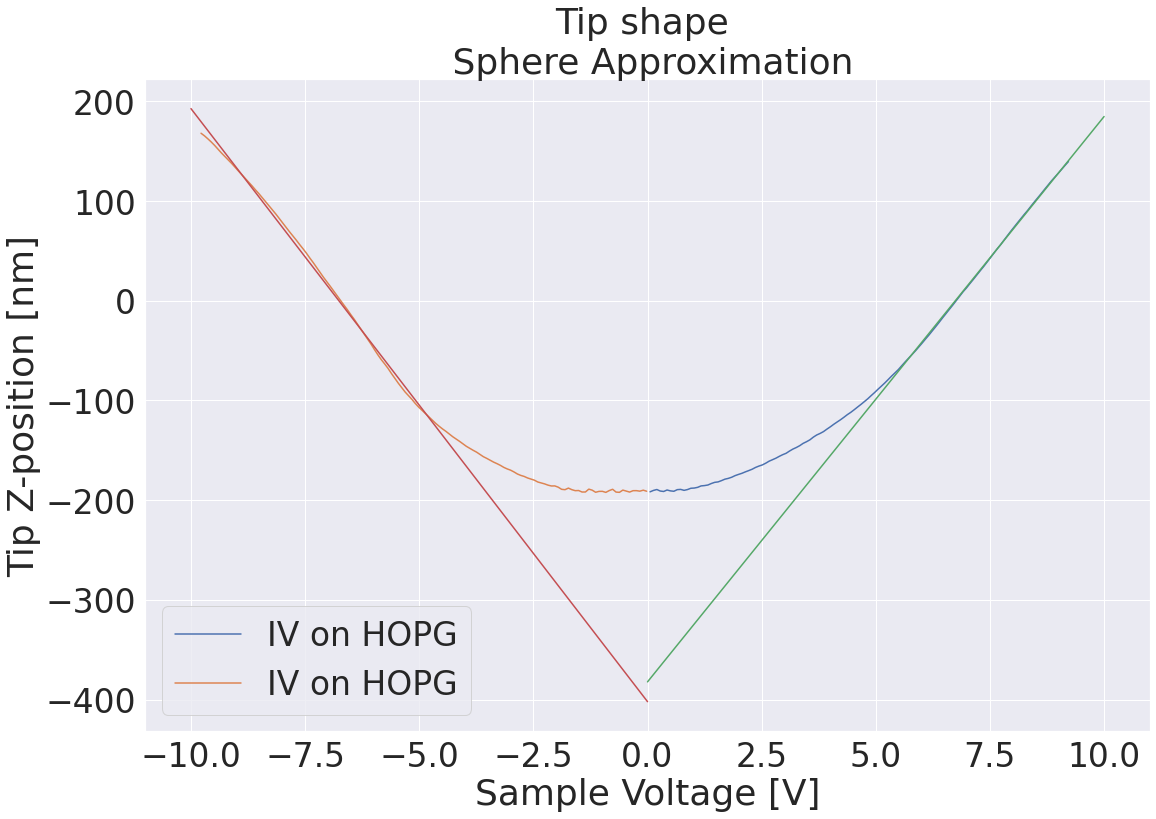

time: 782 ms (started: 2022-08-19 21:17:25 +00:00)


In [ ]:
fig, ax = plt.subplots(figsize=(18, 12))
sns.set_theme()
sns.set(font_scale = 3)
0

xa=np.linspace(0,10,100)
xb=np.linspace(-10,0,100)
#plt.plot(x,Sphere2(x,1.31*10**(-6),0.011,-386,-.279),label=r'$R=1.31\mu m$'+ '\n'+r'F$\prime$=0.011N/m')
x1=Cur1f[Cur1f["x1"]>(0+0.280)]
x2=Cur1f[Cur1f["x1"]<(0+0.280)]
x1a=x1["x1"]-.28
y1a=x1["y1"]
x2a=x2["x1"]-.28
y2a=x2["y1"]

slope, intercept, r, p, se = stats.linregress(x1a[70:], y1a[70:])
slope2, intercept2, r, p, se = stats.linregress(x2a[:64], y2a[:64])


sns.lineplot(x=x1a,y=y1a,label="IV on HOPG")
sns.lineplot(x=x2a,y=y2a,label="IV on HOPG")
sns.lineplot(x=xa,y=xa*slope+intercept)
sns.lineplot(x=xb,y=xb*slope2+intercept2)

plt.legend()
plt.title("Tip shape \n Sphere Approximation")
plt.xlabel("Sample Voltage [V]")
plt.ylabel("Tip Z-position [nm]")

In [ ]:
slope

56.24973805065033

time: 4.53 ms (started: 2022-08-19 20:01:53 +00:00)


In [ ]:
slope2

-59.46511971129724

time: 11.8 ms (started: 2022-08-19 21:17:46 +00:00)


In [ ]:
56**2*0.011/(np.pi*eps0)*10**-9

1240.164652563366

time: 4.97 ms (started: 2022-08-19 21:33:35 +00:00)


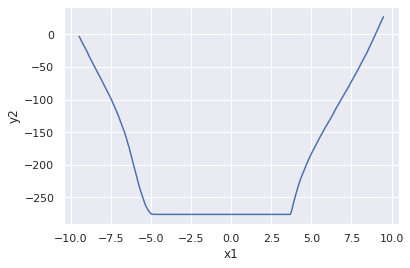

time: 668 ms (started: 2022-08-27 00:30:03 +00:00)


In [ ]:
Curzf = pd.read_csv (r'SampleA_new_tip__0253_Topography_Avg.iv.cur',sep=' ',header=150,names=['x1','y1','x2','y2','nan'])
sns.lineplot(data=Curzf,x='x1',y='y2')
